In [1]:
import pandas as pd
import altair as alt
import numpy as np
alt.data_transformers.disable_max_rows()
import matplotlib.pyplot as plt 

In [87]:
df = pd.read_csv('electricity.csv')


In [88]:
df = df.iloc[::-1]
df = df.sort_index(ascending=False, axis=0)

In [72]:
df #reversed data frame so now years come in natural order...

,datetime,production_nuclear,production_thermal,production_renewable,production_heat_power,production_hydro,production_pumped_hydro,consumption_total
59014,01.01.2014 01:00:00,10728,2016,50,8892,1809,0,20586
59013,01.01.2014 02:00:00,10606,2014,49,8885,863,0,19665
59012,01.01.2014 03:00:00,10515,2022,54,8731,355,0,19107
59011,01.01.2014 04:00:00,10475,2014,42,8369,185,0,18453
59010,01.01.2014 05:00:00,10427,2009,49,8355,274,0,18072
...,...,...,...,...,...,...,...,...
4,03.10.2020 16:00:00,8399,1161,1471,3781,1006,0,14842
3,03.10.2020 17:00:00,8421,1186,1009,3894,831,321,15006
2,03.10.2020 18:00:00,8410,1305,319,4222,974,644,15451
1,03.10.2020 19:00:00,8418,1414,159,4663,1499,800,16438


In [89]:
df['total_prod'] = (df.production_nuclear+df.production_thermal+df.production_renewable+
    df.production_heat_power+df.production_hydro+df.production_pumped_hydro)
df['production_nuclear_%'] = df.production_nuclear/df['total_prod']
df['production_thermal_%'] = df.production_thermal/df['total_prod']
df['production_renewable_%'] = df.production_renewable/df['total_prod']
df['production_heat_power_%'] = df.production_heat_power/df['total_prod']
df['production_hydro_%'] = df.production_hydro/df['total_prod']
df['production_pumped_hydro_%'] = df.production_pumped_hydro/df['total_prod']

In [ ]:
"""
I think the first visualization in this task will be to show, what is the fraction of every 
energy source, comparing to the total energy consumption  - that will show us, how the Ukraine's
energy industry developed since 2014. For example, does the renewable energy sources contribute
more to the total production since that time or not.

The second one, that still might be very informative - the rate of 
consumption / production. It will show us, was there enough energy resourses in Ukraine
for all the time, or sometimes we had over or under producting.

PS: I got overwhelmed by Altair in this task, so used smth more plain with more code =)
"""

In [90]:
df.datetime = pd.to_datetime(df.datetime)
df.set_index(df.datetime,inplace=True)

In [91]:
df = df.groupby([df.index.year,df.index.month]).mean().iloc[:-3] #get rid of last 3 month in 2020 

In [92]:
df 

production_nuclear  production_thermal  \
datetime datetime                                           
2014     1               10812.779273         1850.572005   
         2               10805.505952         1615.191964   
         3               10115.851952         1380.846568   
         4                9131.437500          995.786111   
         5                8957.192463          771.831763   
...                               ...                 ...   
2020     5                7644.017857         1212.285714   
         6                7568.472222         1274.879630   
         7                8279.953535         1401.816162   
         8                8239.260417         1400.690476   
         9                8112.026235         1366.390432   

                   production_renewable  production_heat_power  \
datetime datetime                                                
2014     1                   188.207268           11533.796770   
         2                   174.901786           10450.930060   
         3                   227.734859            9990.838493   
         4                   160.843056            9747.245833   
         5                   151.886945            9705.574697   
...                                 ...                    ...   
2020     5                   953.827381            4437.441964   
         6                  1005.800926            4326.939815   
         7                  1122.519192            3616.052525   
         8                  1161.647321            3549.183036   
         9                  1109.558642            4110.325617   

                   production_hydro  production_pumped_hydro  \
datetime datetime                                              
2014     1              1074.780619               101.492598   
         2              1058.392857                93.943452   
         3               942.126514                98.391655   
         4              1213.258333                99.005556   
         5              1115.853297                99.557201   
...                             ...                      ...   
2020     5               604.888393               180.583333   
         6               878.762346               158.529321   
         7               735.963636               171.494949   
         8               647.886905               196.389881   
         9               621.351852               205.450617   

                   consumption_total    total_prod  production_nuclear_%  \
datetime datetime                                                          
2014     1              22652.786003  25561.628533              0.431237   
         2              21348.281250  24198.866071              0.451733   
         3              20267.993271  22755.790040              0.449484   
         4              19271.969444  21347.576389              0.432777   
         5              18798.617766  20801.896366              0.434274   
...                              ...           ...                   ...   
2020     5              14545.930060  15033.044643              0.509950   
         6              14770.453704  15213.384259              0.498762   
         7              14862.638384  15327.800000              0.542632   
         8              14670.877976  15195.058036              0.545472   
         9              14709.257716  15525.103395              0.525571   

                   production_thermal_%  production_renewable_%  \
datetime datetime                                                 
2014     1                     0.069812                0.007561   
         2                     0.064829                0.007439   
         3                     0.059509                0.010032   
         4                     0.045403                0.007703   
         5                     0.035349                0.007410   
...                                 ...                     ...   
2020    

In [93]:
ranges = pd.date_range(start='01.01.2014',end='10.01.2020',freq='M') #ranges for further purpose

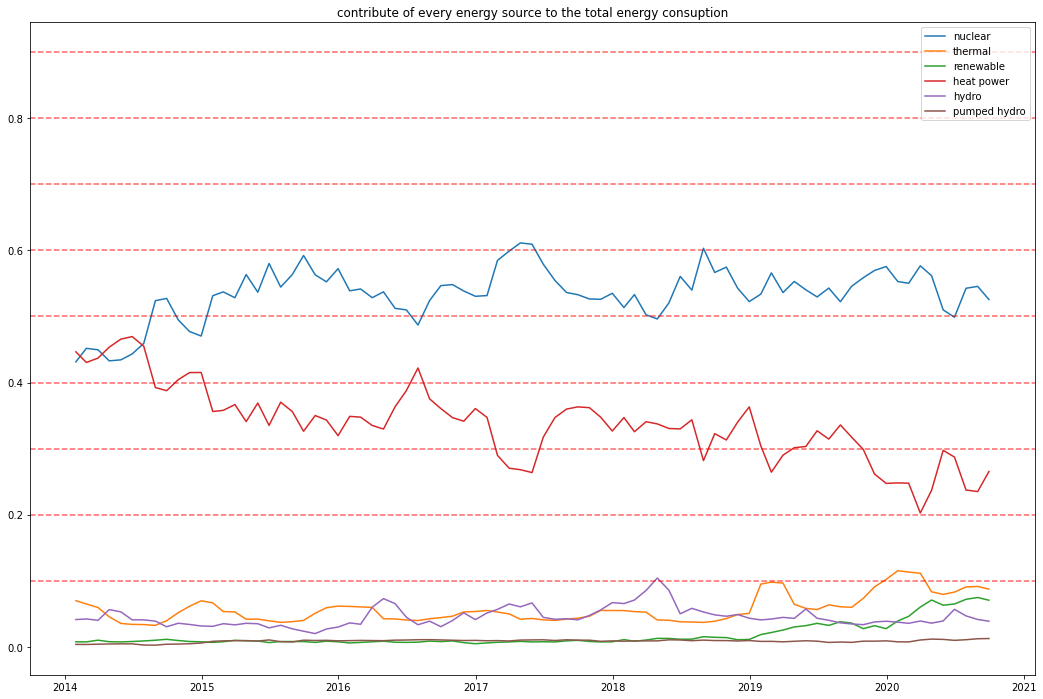

In [113]:
fig, ax = plt.subplots(1,1, figsize = (18,12)) 

plt.plot(ranges,df['production_nuclear_%'], label = 'nuclear')
plt.plot(ranges,df['production_thermal_%'], label = 'thermal')
plt.plot(ranges,df['production_renewable_%'], label = 'renewable')
plt.plot(ranges,df['production_heat_power_%'], label = 'heat power')
plt.plot(ranges,df['production_hydro_%'], label = 'hydro')
plt.plot(ranges,df['production_pumped_hydro_%'], label = 'pumped hydro')
plt.title('contribute of every energy source to the total energy consuption')

ax.axhline(0.1, color = 'red',linestyle = '--',alpha =0.6)
ax.axhline(0.2, color = 'red',linestyle = '--',alpha =0.6)
ax.axhline(0.3, color = 'red',linestyle = '--',alpha =0.6)
ax.axhline(0.4, color = 'red',linestyle = '--',alpha =0.6)
ax.axhline(0.5, color = 'red',linestyle = '--',alpha =0.6)
ax.axhline(0.6, color = 'red',linestyle = '--',alpha =0.6)
ax.axhline(0.7, color = 'red',linestyle = '--',alpha =0.6)
ax.axhline(0.8, color = 'red',linestyle = '--',alpha =0.6)
ax.axhline(0.9, color = 'red',linestyle = '--',alpha =0.6)

plt.legend()
plt.show()

In [ ]:
"""
What conclusion can be made out of this? 
First of all, we really see that the % of renewable
energy has heavily increased since 2014 - its almost 10% now - it may say that Ukraine started 
to look for alternative enegry sources as the whole world does. At the same time, the thermal
energy contribution is also gives us a 10% of energy in total, lower results
all years back - good sign as well. 
Secondly, we can see that the heat power production fell grealty since 2014 - from 45% to 25%
of total. That may be caused by the war actions on the East which cause the big loss of 
coal quarries in those regions - so we had to look for alternative energy sources and develop
those much more, especially considering that total energy consumption has increased.
The nuclear energy prod is oscillating in range of 55% - the biggest energy provider.
The overall consumption of hydro and pumped hydro power did not change signicifantly since 2014
"""

In [85]:
df['total_prod'] = (df.production_nuclear+df.production_thermal+df.production_renewable+
    df.production_heat_power+df.production_hydro+df.production_pumped_hydro)
df['rate'] = df.consumption_total/df['total_prod']

df.datetime = pd.to_datetime(df.datetime)
df.set_index(df.datetime,inplace=True)

df_new = df.groupby([df.index.year,df.index.month]).mean()

rate = df_new.rate[:-3]
ranges = pd.date_range(start='2014-01-01', end='2020-10-03',freq='M')

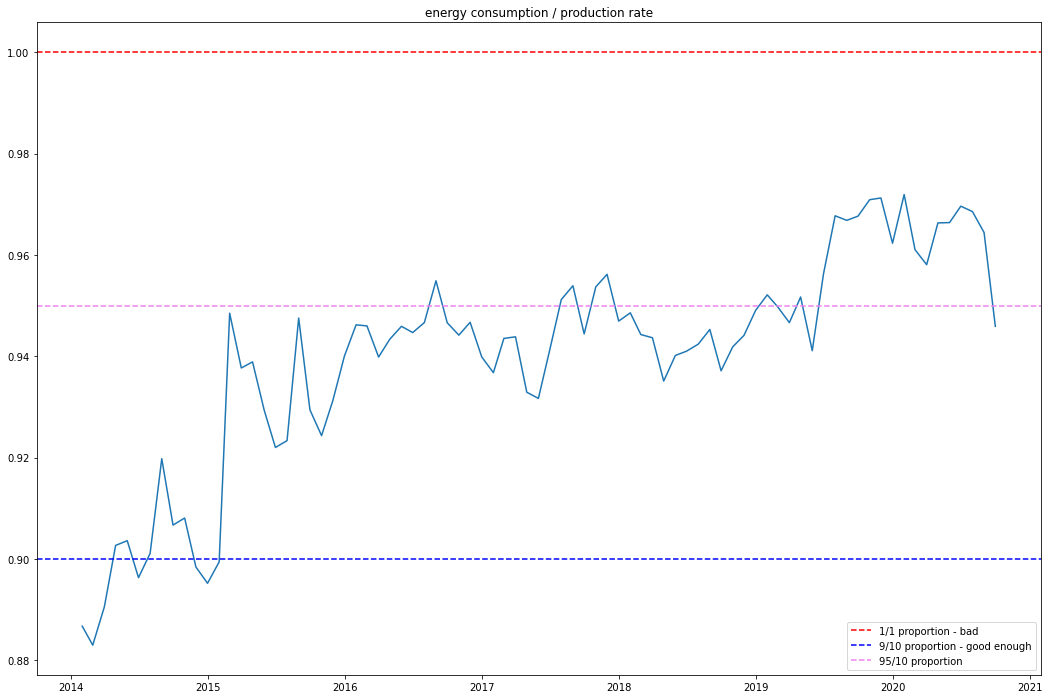

In [86]:
fig, ax = plt.subplots(1,1, figsize = (18,12))
plt.plot(ranges,rate)
plt.axhline(1, color = 'red',linestyle = '--',alpha =1, label = '1/1 proportion - bad')
plt.axhline(0.9, color = 'blue',linestyle = '--',alpha =1, label = '9/10 proportion - good enough')
plt.axhline(0.95, color = 'violet',linestyle = '--',alpha =1, label = '95/10 proportion')
plt.title('energy consumption / production rate')
plt.legend()

In [ ]:
"""
This chart also gives us some information to think about. It is well seen, that from the
year 2014 we have definitely lost some energy production power and we had to use the 
storages for the inner needs. Still, the overall picture
is good enough - we are able to product more than we need, having about 5% of resourses being
stored (if that is possible - otherwise it may say about inefficient use of natural resourses)
By the way, the last couple of years we have either used more energy that before, either 
producted less.
"""